Linear Congeruent Generator

In [184]:
import matplotlib.pyplot as plt
import math
from sympy import isprime
import scipy.stats
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.10f}'.format

In [185]:
class LCG: 
    def __init__(self, a, c, m, start, n):
        self.a = a
        self.c = c
        self.m = m
        self.start = start
        self.generated = []
        self.count_n_items(n)
        self.U = [i / self.m for i in self.generated]

    
    def __str__(self) -> str:
        return "Linear Congruent Generator:\n x_n+1 = ({} * x_n + {}) mod {};  x0 = {}.".format(self.a, self.c, self.m, self.start)

    def count_next(self):
        if len(self.generated) == 0:
            return (self.a * self.start + self.c) % self.m
        elif len(self.generated) > 0:
            return (self.a * self.generated[len(self.generated) - 1] + self.c) % self.m 

    def count_n_items(self, n):
        for i in range(n+300):
            self.generated.append(self.count_next())
    
    def get_mean(self, n):
        return np.mean(self.U[:n])
    
    def get_var(self, n):
        return np.var(self.U[:n])

Maclaren-Marsaglia generator

In [186]:
class MMG:
    def __init__(self, generator1, generator2, k, n):
        self.X = generator1
        self.Y = generator2
        self.k = k
        self.n = n
        self.V = [self.X.generated[i] for i in range(k)]
        self.U = [0 for _ in range(n)]
        self.generate()
    
    def generate(self):
        for i in range(self.n):
            s = math.floor(self.Y.generated[i] * self.k / self.Y.m)
            self.U[i] = self.V[s] / self.X.m 
            self.V[s] = self.X.generated[i+self.k]
    
    def get_mean(self, n):
        return sum(self.U[:n]) / n
    
    def get_var(self, n):
        m = 1 / n * sum(self.U[:n])
        return sum([(self.U[i] - m)**2 for i in range(n)]) / (n - 1)
            

In [187]:
n1 = 10**4
n2 = 10**6
eps = 0.05

Задание №1

In [188]:
# 1
generator_11 = LCG(11, 1, 161, 17, n2)
#generator_11 = LCG(17, 1, 167, 19, n2)
print(generator_11)
#generator_12 = LCG(859, 2531, 11979, 7, n2)
generator_12 = LCG(75, 74, 2**16+1, 7, n2)
#generator_12 = LCG(16807, 0, 2**31-1, 7, n2)
print(generator_12)
generator_13 = LCG(25214903917, 11,2**48, 2**8, n2)
print(generator_13)

Linear Congruent Generator:
 x_n+1 = (11 * x_n + 1) mod 161;  x0 = 17.
Linear Congruent Generator:
 x_n+1 = (75 * x_n + 74) mod 65537;  x0 = 7.
Linear Congruent Generator:
 x_n+1 = (25214903917 * x_n + 11) mod 281474976710656;  x0 = 256.


Задание №2.

In [189]:
# генератор Маклорена-Марсальи
mmg = MMG(generator_12, generator_13, 128, n2)

Статистика по генераторам

In [190]:
def style_df(df):
    return df.style \
      .format(precision=10, thousands=".", decimal=",") \
      .relabel_index(['LCG1', 'LCG2', 'LCG3', 'MMG'], axis=0) 
      
  # статисика для 10^4

stat_data_n1 = [[generator_11.get_mean(n1)],
         [generator_12.get_mean(n1)],
          [generator_13.get_mean(n1)],
           [mmg.get_mean(n1)]]
stat_data_n1_df = style_df(pd.DataFrame(stat_data_n1,
                  columns=['Mean']))


# статистика для 10^6

stat_data_n2 = [[generator_11.get_mean(n2)],
         [generator_12.get_mean(n2)],
          [generator_13.get_mean(n2)],
           [mmg.get_mean(n2)]]
stat_data_n2_df = style_df(pd.DataFrame(stat_data_n2,
                  columns=['Mean']))

Статистика для генераторов при N=10^4

In [191]:
stat_data_n1_df

,Mean
LCG1,"0,5084335404"
LCG2,"0,4965878542"
LCG3,"0,4976125170"
MMG,"0,4964063933"


Статистика для генераторов при N=10^6

In [192]:
stat_data_n2_df

,Mean
LCG1,"0,5084694286"
LCG2,"0,4999493307"
LCG3,"0,5002111911"
MMG,"0,4999555193"


Задание №3

3.1 Построить диаграммы рассеяния

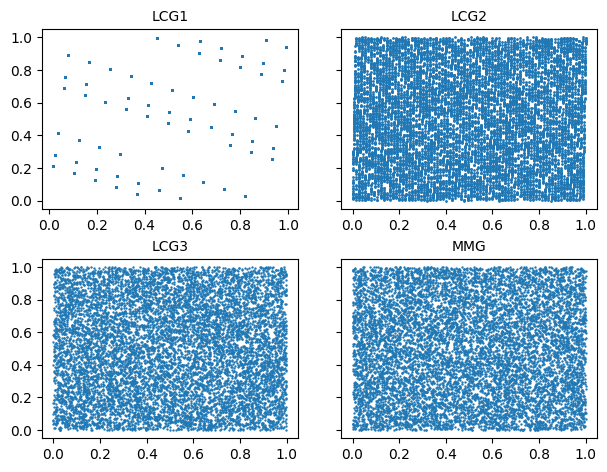

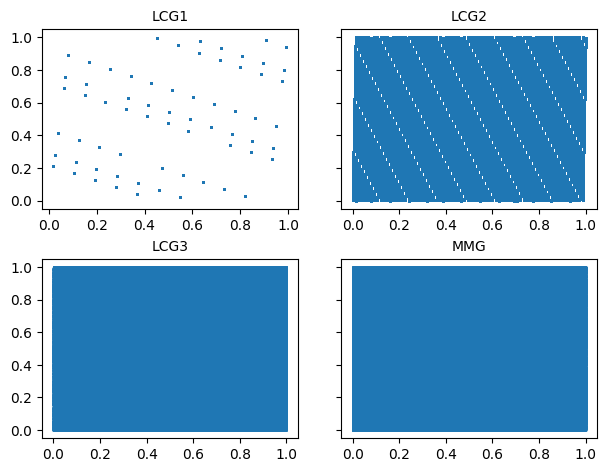

In [193]:
def draw_scatters(rng, n):
    fig, axs = plt.subplots(nrows= 2 , ncols= 2, sharex = False, sharey = True)
    fig.tight_layout(pad=1.5)
    axs[0, 0].set_title("LCG1" , loc ='center', fontsize = 10, fontweight = 0)
    axs[0, 0].scatter(rng[0].U[:(n-1)], rng[0].U[1:n], s = 1)
    axs[0, 1].set_title("LCG2", loc ='center', fontsize = 10, fontweight = 0)
    axs[0, 1].scatter(rng[1].U[:(n-1)], rng[1].U[1:n], s = 1)
    axs[1, 0].set_title("LCG3", loc ='center', fontsize = 10, fontweight = 0)
    axs[1, 0].scatter(rng[2].U[:(n-1)], rng[2].U[1:n], s = 0.5)
    axs[1, 1].set_title("MMG", loc ='center', fontsize = 10, fontweight = 0)
    axs[1, 1].scatter(rng[3].U[0:(n-1)], rng[3].U[1:n], s = 0.5)
    plt.plot()

def draw_scatter(rng, n):
    fig, axs = plt.subplots(nrows= 1 , ncols= 1, sharex = True, sharey = True)
    x = rng.U[:(n-1)]
    y = rng.U[1:n]
    axs.scatter(x, y, s = 1)
    plt.plot()
    
draw_scatters([generator_11, generator_12, generator_13, mmg], 10**4)
draw_scatters([generator_11, generator_12, generator_13, mmg], 10**6)

3.2 Тест "совпадения моментов" (уровень значимости = 0.05)

In [194]:
def test_moments_mean(dataset):
    n = len(dataset)
    m = sum(dataset) / n 
    summa = 0
    for i in dataset:
        summa += i 
    mn= summa / len(dataset)
    ksi_1 = m - 0.5
    c1 = math.sqrt(12 * n)
    delta = scipy.stats.norm.ppf(1 - eps / 2)
    return round(c1* abs(ksi_1), 10), round(delta, 10), eps, c1* abs(ksi_1) < delta
    

def test_moments_var(dataset):
    n = len(dataset)
    m = 1 / n * sum(dataset)
    s_2 = sum([(dataset[i] - m)**2 for i in range(n)]) / (n - 1) 
    print("Дисперсия: ", s_2)
    ksi_2 = s_2 - (1 / 12)
    c2 = (n - 1) / n / math.sqrt (0.0056 / n + 0.0028 / n**2 - 0.0083 / n**3)
    delta = scipy.stats.norm.ppf(1 - eps / 2)
    return round(c2* abs(ksi_2), 10), round(delta, 10), eps, c2* abs(ksi_2) < delta

def test_info(test1, test2):
    return [test1[0], test2[0], test1[1], test2[1], test1[2], test1[3], test2[3]]

def form_test_moments_statistic(test_result):
    test_results = []
    for res in test_result:
        test_results.append(test_info(res[0], res[1]))
    return style_df(pd.DataFrame(test_results,
                  columns=['Statistics for N=10**4', 'Statistics for N =10**6', 'Critical value N1', 'Critical value N2', 'eps', 'H0 N=10**4', 'H0 N= 10**6']))   


Результаты теста моментов для математического ожидания

In [195]:
test_moments_mean_res = [[test_moments_mean(generator_11.U[:n1]), test_moments_mean(generator_11.U[:n2])], 
                         [test_moments_mean(generator_12.U[:n1]), test_moments_mean(generator_12.U[:n2])], 
                         [test_moments_mean(generator_13.U[:n1]),test_moments_mean(generator_13.U[:n2])],
                         [test_moments_mean(mmg.U[:n1]), test_moments_mean(mmg.U[:n2])]]

df_test_mean = form_test_moments_statistic(test_moments_mean_res)
df_test_mean

,Statistics for N=10**4,Statistics for N =10**6,Critical value N1,Critical value N2,eps,H0 N=10**4,H0 N= 10**6
LCG1,"2,9214640826","29,3389611945","1,9599639845","1,9599639845","0,0500000000",False,False
LCG2,"1,1820019814","0,1755237142","1,9599639845","1,9599639845","0,0500000000",True,True
LCG3,"0,8270483546","0,7315872591","1,9599639845","1,9599639845","0,0500000000",True,True
MMG,"1,2448618652","0,1540857368","1,9599639845","1,9599639845","0,0500000000",True,True


Результаты теста моментов для дисперсии

In [196]:
test_moments_var_res = [[test_moments_var(generator_11.U[:n1]), test_moments_var(generator_11.U[:n2])], 
                         [test_moments_var(generator_12.U[:n1]), test_moments_var(generator_12.U[:n2])], 
                         [test_moments_var(generator_13.U[:n1]),test_moments_var(generator_13.U[:n2])],
                         [test_moments_var(mmg.U[:n1]), test_moments_var(mmg.U[:n2])]]

df_test_var = form_test_moments_statistic(test_moments_var_res)
df_test_var

Дисперсия:  0.08536962562272243
Дисперсия:  0.0853271575480353
Дисперсия:  0.08454871200750097
Дисперсия:  0.08333354607571543
Дисперсия:  0.08323609507517438
Дисперсия:  0.08323669149861966
Дисперсия:  0.0844661055255114
Дисперсия:  0.08333447480721383


,Statistics for N=10**4,Statistics for N =10**6,Critical value N1,Critical value N2,eps,H0 N=10**4,H0 N= 10**6
LCG1,"2,7207699216","26,6435634843","1,9599639845","1,9599639845","0,0500000000",False,False
LCG2,"1,6239150721","0,0028428861","1,9599639845","1,9599639845","0,0500000000",True,True
LCG3,"0,1299238471","1,2914292240","1,9599639845","1,9599639845","0,0500000000",True,True
MMG,"1,5135413145","0,0152535673","1,9599639845","1,9599639845","0,0500000000",True,True


3.3 Тест ковариация (уровень значимости = 0.05; j = 0,...,10)

In [197]:
def covariation_test(dataset, t = 11):
    n = len(dataset)
    statistics = []
    c = [np.sqrt(2) if i == 0 else 1 for i in range(t)]
    count = 0
    for j in range(t):
        if j == 0:
            r = 1/12
        elif j>0:
            r = 0
        summa = 0
        for i in range(n - j):
            summa = summa + dataset[i] * dataset[i + j]
        rh = (summa / (n - j - 1)) - (n * (np.mean(dataset))**2 / (n - 1)) 
        delta = c[j] * scipy.stats.norm.ppf(1 - eps / 2) / 12 / np.sqrt(n-1)
        statistics.append([np.fabs(rh - r), delta])
        if statistics[j][0] < statistics[j][1]:
             count+=1
    stat = "".join(["{:.10f}\n".format(elem[0]) for elem in statistics])
    delt = "".join(["{:.10f}\n".format(elem[1]) for elem in statistics])
    return stat, delt, eps, count == 11


Результаты теста ковариации

In [198]:
test_covar_res = [[covariation_test(generator_11.U[:n1]), covariation_test(generator_11.U[:n2])], 
                  [covariation_test(generator_12.U[:n1]), covariation_test(generator_12.U[:n2])], 
                  [covariation_test(generator_13.U[:n1]), covariation_test(generator_13.U[:n2])],
                  [covariation_test(mmg.U[:n1]), covariation_test(mmg.U[:n2])]]
df_test_covar = form_test_moments_statistic(test_covar_res)
df_test_covar


,Statistics for N=10**4,Statistics for N =10**6,Critical value N1,Critical value N2,eps,H0 N=10**4,H0 N= 10**6
LCG1,0.0020362923 0.0162843076 0.0035118844 0.0062518549 0.0153608100 0.0004732041 0.0004160816 0.0097860063 0.0071060588 0.0043576662 0.0083835998,0.0019938242 0.0162512112 0.0035119680 0.0062412311 0.0153695878 0.0004409262 0.0003471870 0.0096644882 0.0070289934 0.0042996462 0.0083461169,0.0023099552 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850,0.0002309841 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304,"0,0500000000",False,False
LCG2,0.0012153787 0.0008126303 0.0009032799 0.0012147820 0.0000442435 0.0013243654 0.0000819237 0.0002760013 0.0017673142 0.0002795823 0.0002049978,0.0000002127 0.0011023911 0.0000023546 0.0000316875 0.0000043249 0.0000125322 0.0000057978 0.0000067813 0.0001142731 0.0000107028 0.0000061991,0.0023099552 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850,0.0002309841 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304,"0,0500000000",False,False
LCG3,0.0000972383 0.0004272592 0.0011028802 0.0001447108 0.0002611806 0.0008677514 0.0000366015 0.0000853599 0.0017783538 0.0020759830 0.0014281538,0.0000966418 0.0000726232 0.0000534633 0.0001890725 0.0000243671 0.0000009510 0.0000083884 0.0001889611 0.0000484480 0.0000179613 0.0000217459,0.0023099552 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850,0.0002309841 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304,"0,0500000000",False,False
MMG,0.0011327722 0.0003057677 0.0005929047 0.0006737696 0.0002034579 0.0000174411 0.0005244617 0.0009772227 0.0004838223 0.0003806515 0.0003869564,0.0000011415 0.0000584105 0.0001048360 0.0000619766 0.0000034039 0.0000909621 0.0000936163 0.0000599531 0.0000584789 0.0000535033 0.0000016998,0.0023099552 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850 0.0016333850,0.0002309841 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304 0.0001633304,"0,0500000000",True,True


3.4 Критерий хи-квадрат Пирсона (число ячеек = 1000; уровень значимости = 0.05)

In [199]:
def chi2(dataset):
    k = 1000
    step = 1 / k
    a = [0 for _ in range(k + 1)]
    n = [0 for _ in range(k)]
    for i in range(k + 1):
        a[i] = i * step
    dataset_sorted = [i for i in dataset]
    dataset_sorted.sort()
    interval = 1
    l = 0
    while interval <= k and l < len(dataset_sorted):
        if a[interval-1] <= dataset_sorted[l] < a[interval]:
            n[interval - 1] +=1
            l+=1
        else:
            interval += 1
    expected = len(dataset_sorted) / k
    chi = 0
    for i in range(k):
        chi += (n[i]-expected)**2 / expected
    delta = scipy.stats.chi2(k - 1).ppf(1 - 0.05)
    return round(chi, 2), round(delta, 2), eps, chi < delta


Рузультаты теста хи-квадрат

In [200]:
chi2_test_res = [[chi2(generator_11.U[:n1]), chi2(generator_11.U[:n2])], 
                  [chi2(generator_12.U[:n1]), chi2(generator_12.U[:n2])], 
                  [chi2(generator_13.U[:n1]), chi2(generator_13.U[:n2])],
                  [chi2(mmg.U[:n1]), chi2(mmg.U[:n2])]]

df_test_chi2 = form_test_moments_statistic(chi2_test_res)
df_test_chi2

,Statistics for N=10**4,Statistics for N =10**6,Critical value N1,Critical value N2,eps,H0 N=10**4,H0 N= 10**6
LCG1,"141.516,8000000000","14.151.515,1699999999","1.073,6400000000","1.073,6400000000","0,0500000000",False,False
LCG2,"873,4000000000","73,6600000000","1.073,6400000000","1.073,6400000000","0,0500000000",True,True
LCG3,"982,2000000000","1.017,7300000000","1.073,6400000000","1.073,6400000000","0,0500000000",True,True
MMG,"868,8000000000","73,8300000000","1.073,6400000000","1.073,6400000000","0,0500000000",True,True
